In [1]:
import os
from DBReader.DBReader import SyncReader
from SignalProcessing.rpl import RadarSignalProcessing
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

c:\Users\nxg05733\Panoptic-lifting\panoptic-lifting-main\panoptic-lifting-main\panoptic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "E:\\RADIal" ## Replace with your path
# make a image folder
os.makedirs('output\\images', exist_ok=True)

# make a ra folder
os.makedirs('output\\ra', exist_ok=True)

# get all folders in the directory
folders = [f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))]
print(f"Len of Folders {len(folders)}")
# iterate over all folders
for folder in folders:
    
    # make a sub_folder in output for image and ra
    os.makedirs(os.path.join('output\\images', folder), exist_ok=True)
    os.makedirs(os.path.join('output\\ra', folder), exist_ok=True)

   

    # get all files in the folder
    db=SyncReader(os.path.join(file_path, folder), tolerance=40000,silent=True)
    test = 10
    
    for i in tqdm(range(len(db)), desc="Processing and Saving images", total=len(db)):
        try:
            data = db.GetSensorData(i)
        except:
            print(f"PROBLEM: Folder {folder}, index {i}")
            continue

        # obtain the RA plots (assuming with Torch)
        """ RSP = RadarSignalProcessing('SignalProcessing\\CalibrationTable.npy',
                                    method='RA',device='cpu',) # REPLACE with path to CalibrationTable.npy """
        
        RSP = RadarSignalProcessing('C:\\Users\\nxg05733\\RADIal\\SignalProcessing\\CalibrationTable.npy',
                                    method='RA',device='cuda', lib="PyTorch") # REPLACE with path to CalibrationTable.npy
        
        ra=RSP.run(data['radar_ch0']['data'],data['radar_ch1']['data'],
                data['radar_ch2']['data'],data['radar_ch3']['data'])
        
        # Flipping the image to match the orientation of the camera
        ra = cv2.rotate(ra,cv2.ROTATE_180 )

        # save the RA plot in the ra folder under the folder
        plt.imsave(os.path.join('output\\ra', folder, "RADAR"+ str(i)+'.png'), ra)

        # save the images in the image folder under the folder
        plt.imsave(os.path.join('output\\images', folder, "RADAR"+ str(i)+'.png'),data['camera']['data'])
       
            
        
          

       

    

Len of Folders 96


Processing and Saving images:  50%|█████     | 619/1226 [15:55<15:37,  1.54s/it]


KeyboardInterrupt: 

In [2]:
total_file =0
import os
folders = os.listdir("output")

In [7]:
for folder in folders:
    total_file =0
    path = os.path.join("output",folder)
    files = os.listdir(path)
    for file in files:
        count = len(os.listdir(os.path.join(path,file)))
        total_file = total_file + count
    
    print(total_file
          )
print(total_file)

30120
30120
30120


Testing how the RA is saved


In [4]:
def process_folder(file_path, folder):
    print(f"Staring for folder {folder}")
    """ os.makedirs(os.path.join('output\\images', folder), exist_ok=True)
    os.makedirs(os.path.join('output\\ra', folder), exist_ok=True) """

    try:
        db = SyncReader(os.path.join(file_path, folder), tolerance=40000, silent=True)
   
        for i in range(len(db)):
            data = db.GetSensorData(i)
            RSP = RadarSignalProcessing('SignalProcessing\\CalibrationTable.npy',
                                    method='RA',device='cuda', lib="PyTorch")
            
            ra=RSP.run(data['radar_ch0']['data'],data['radar_ch1']['data'],
                    data['radar_ch2']['data'],data['radar_ch3']['data'])
            
            ra = cv2.rotate(ra,cv2.ROTATE_180 )
            print(ra.shape)
            
            #plt.imsave(os.path.join('output\\ra', folder, "RADAR"+ str(i)+'.png'), ra)
            #plt.imsave(os.path.join('output\\images', folder, "RGB"+ str(i)+'.png'),data['camera']['data'])
    except:
        print(f"PROBLEM: Folder {folder}")


In [5]:
process_folder("E:\RADIal", "RECORD@2020-11-21_11.54.31")

Staring for folder RECORD@2020-11-21_11.54.31
(512, 751)
PROBLEM: Folder RECORD@2020-11-21_11.54.31


In [1]:
import numpy as np
load_path = "C:\\Users\\nxg05733\\RADIal\\output\\ra_matrix\\RECORD@2020-11-21_11.58.53\\RADAR0.npy"
loaded_ra = np.load(load_path)
loaded_ra.shape

(512, 501)

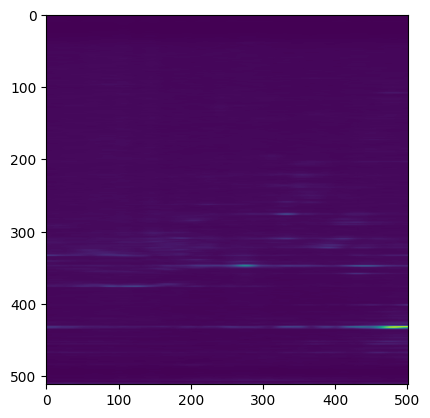

In [3]:
import matplotlib.pyplot as plt
plt.imshow(loaded_ra)

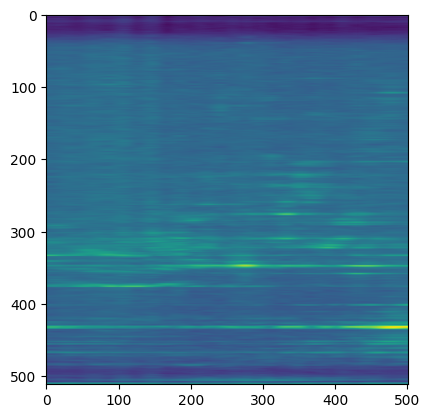

In [4]:
loaded_ra = np.log(loaded_ra+0.1)
plt.imshow(loaded_ra)

(array([2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 1.000e+01, 4.000e+00, 5.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 2.000e+00,
        9.000e+00, 7.000e+00, 8.000e+00, 1.700e+01, 1.200e+01, 1.200e+01,
        1.500e+01, 2.300e+01, 2.100e+01, 3.400e+01, 4.100e+01, 4.100e+01,
        4.000e+01, 4.700e+01, 4.600e+01, 5.700e+01, 6.300e+01, 6.300e+01,
        7.200e+01, 6.500e+01, 7.900e+01, 8.700e+01, 1.110e+02, 9.500e+01,
        1.090e+02, 1.200e+02, 1.200e+02, 1.320e+02, 1.440e+02, 1.270e+02,
        1.480e+02, 1.380e+02, 1.540e+02, 1.670e+02, 1.380e+02, 1.380e+02,
        1.360e+02, 1.340e+02, 1.510e+0

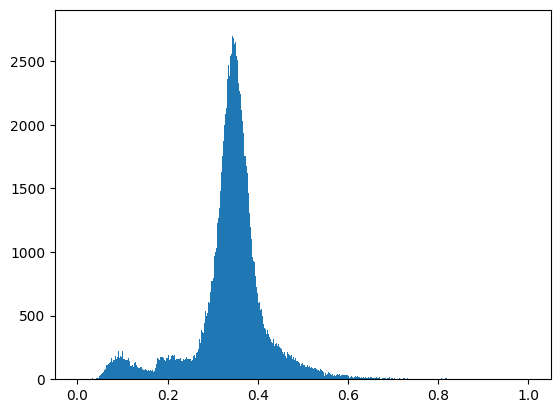

In [8]:
plt.hist(loaded_ra.flatten(), bins=1000)

In [5]:
def normalize(image):
    image = cv2.normalize(image, image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return image

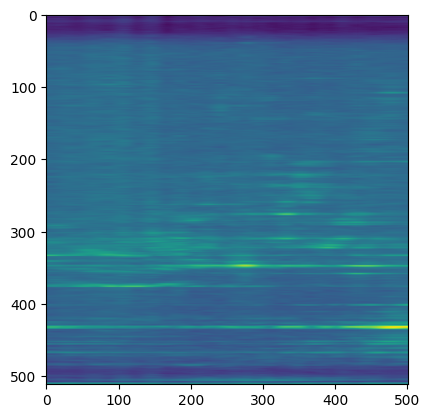

In [6]:
import cv2
loaded_ra_norm = normalize(loaded_ra)
plt.imshow(loaded_ra_norm)

(array([2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 1.000e+01, 4.000e+00, 5.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 2.000e+00,
        9.000e+00, 7.000e+00, 9.000e+00, 1.700e+01, 1.100e+01, 1.200e+01,
        1.700e+01, 2.200e+01, 2.200e+01, 3.300e+01, 4.200e+01, 4.100e+01,
        4.200e+01, 4.400e+01, 4.900e+01, 5.400e+01, 6.500e+01, 6.600e+01,
        6.900e+01, 6.900e+01, 7.500e+01, 9.000e+01, 1.070e+02, 1.030e+02,
        1.090e+02, 1.200e+02, 1.220e+02, 1.280e+02, 1.430e+02, 1.310e+02,
        1.460e+02, 1.390e+02, 1.630e+02, 1.570e+02, 1.400e+02, 1.420e+02,
        1.320e+02, 1.320e+02, 1.570e+0

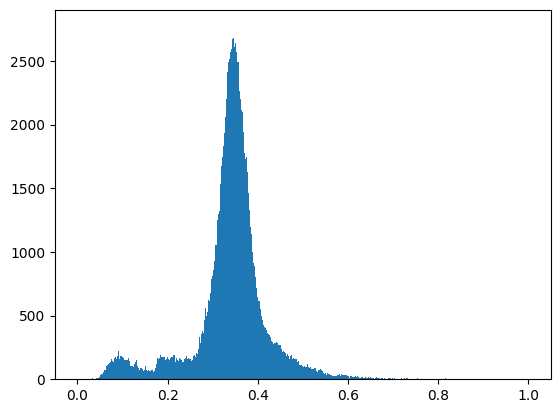

In [10]:
plt.hist(loaded_ra_norm.flatten(), bins=999)

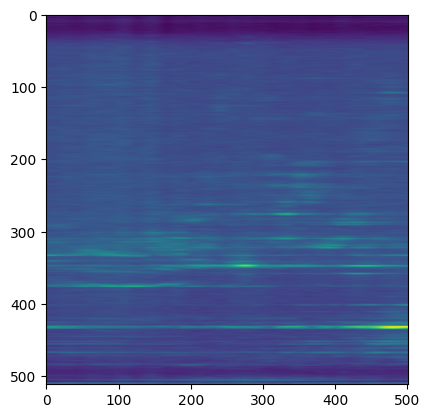

In [7]:
loaded_ra_norm_rev = np.exp(loaded_ra_norm)-0.1
plt.imshow(loaded_ra_norm_rev)